In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt

In [39]:
#read in dataframes for total deaths per state, cumulative deaths per day per state, demographic 
#and macroeconomic indicators
df= pd.read_csv('total_deaths_perstate.csv',index_col=[0])
df2 = pd.read_csv('all_deaths_total.csv', index_col=[0]) 
macro_df = pd.read_csv('macro_df.csv')

In [40]:
print(len(macro_df['State']))
print(df.dtypes)
print(df.shape)
print(df.isna().sum().sum())

50
Date      object
State     object
Fips       int64
Cases      int64
Deaths     int64
dtype: object
(50, 5)
0


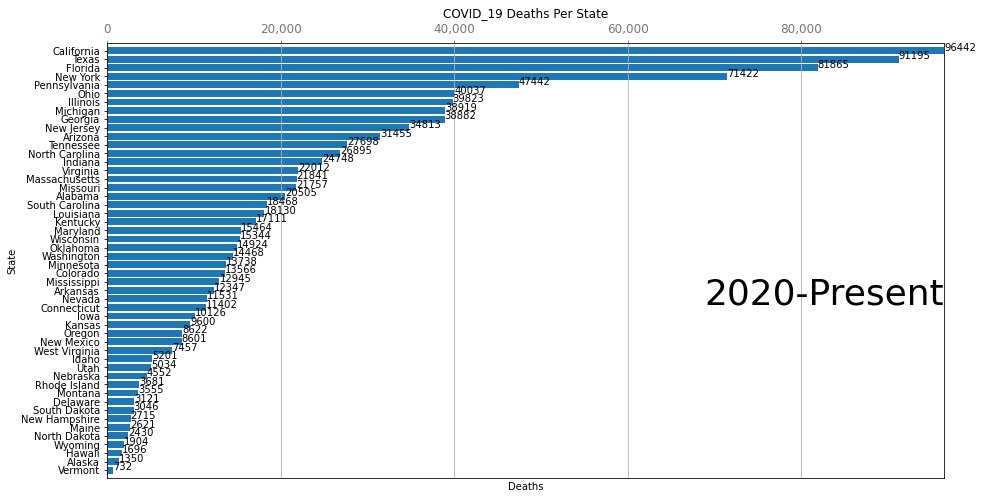

In [5]:
#plot deaths per state
import matplotlib.ticker as ticker

df_desc = df.sort_values(by=['Deaths'],ascending=True)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df_desc['State'], df_desc['Deaths'])
ax.set_title('COVID_19 Deaths Per State')
ax.set_xlabel('Deaths')
ax.set_ylabel('State')

for i, (value, name) in enumerate(zip(df_desc['Deaths'], df_desc['State'])):
    ax.text(value, i,     value,           ha='left')   
# Add year right middle portion of canvas
ax.text(1, 0.4, '2020-Present', transform=ax.transAxes, size=36, ha='right')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')

Do the overall COVID-19 deaths alone indicate that California, Texas and Florida were the most affected?

Specficially investigate top 5 highest affected states.

In [6]:
#import deaths per month for all states 
all_months = pd.read_csv('all_deaths_month.csv',index_col=[0])

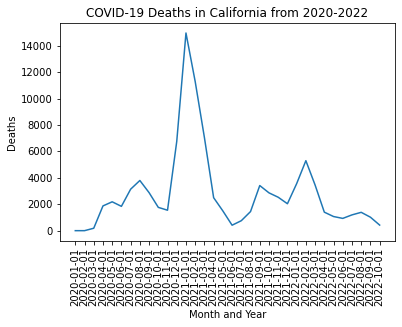

In [7]:
#plots deaths per month for California 
x = all_months[all_months['state']=='California']['Month_year']
y = all_months[all_months['state']=='California']['deaths_permonth']

plt.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in California from 2020-2022')

plt.show()

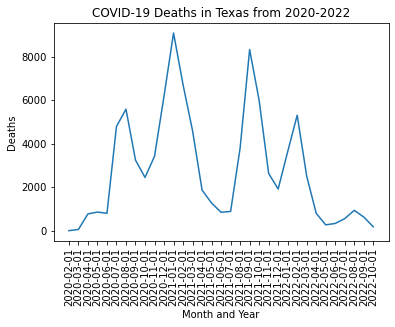

In [8]:
#plots deaths per month for Texas 
x = all_months[all_months['state']=='Texas']['Month_year']
y = all_months[all_months['state']=='Texas']['deaths_permonth']

plt.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Texas from 2020-2022')

plt.show()

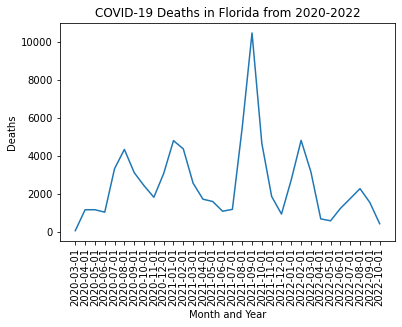

In [9]:
#plots deaths per month for Florida
x = all_months[all_months['state']=='Florida']['Month_year']
y = all_months[all_months['state']=='Florida']['deaths_permonth']

plt.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Florida from 2020-2022')

plt.show()

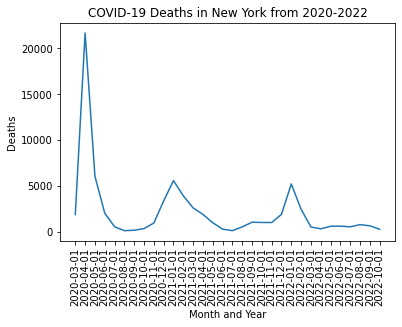

In [10]:
#plots deaths per month for New York
x = all_months[all_months['state']=='New York']['Month_year']
y = all_months[all_months['state']=='New York']['deaths_permonth']

plt.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in New York from 2020-2022')

plt.show()

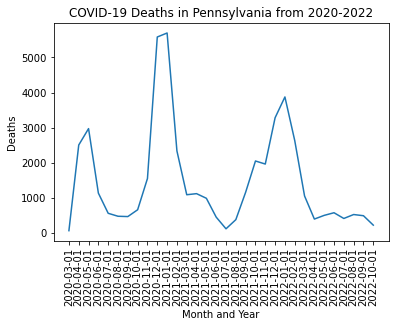

In [11]:
#plots deaths per month for Pennsylvania
x = all_months[all_months['state']=='Pennsylvania']['Month_year']
y = all_months[all_months['state']=='Pennsylvania']['deaths_permonth']

plt.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths in Pennsylvania from 2020-2022')

plt.show()

Which of the top 5 states with the most COVID-19 deaths reflects the same trends as the overall COVID-19 deaths? It seems like California is most similar. Is California the most representative of the United States as a whole when it comes to the features we are investigating? 

In [12]:
#plot deaths versus air traffic
air_traffic = pd.read_csv('air_traffic.csv', index_col=[0]) 
air_traffic = air_traffic[['domestic','Month_year']]

In [13]:
air_vs_deaths = pd.merge(air_traffic, all_months, on='Month_year',how='inner')
air_vs_deaths = air_vs_deaths[~(air_vs_deaths['Month_year'] > '2022-06')]
air_vs_deaths.head()

,domestic,Month_year,state,deaths_permonth
0,61638893,2020-01-01,Arizona,0.0
1,61638893,2020-01-01,California,0.0
2,61638893,2020-01-01,Illinois,0.0
3,61638893,2020-01-01,Washington,0.0
4,59879630,2020-02-01,Arizona,0.0


In [14]:
air_vs_deaths2 = air_vs_deaths.groupby(['Month_year','domestic'])['deaths_permonth'].sum().reset_index()
print(air_vs_deaths2.head())
print(air_vs_deaths2.info())

   Month_year  domestic  deaths_permonth
0  2020-01-01  61638893              0.0
1  2020-02-01  59879630              1.0
2  2020-03-01  34420555           4283.0
3  2020-04-01   2879712          58527.0
4  2020-05-01   7861491          40951.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month_year       29 non-null     object 
 1   domestic         29 non-null     int64  
 2   deaths_permonth  29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 824.0+ bytes
None


The airlines were one of the biggest things to shut down during COVID-19. How does the number of domestic passengers relate to the number of COVID-19 deaths in the United States as a whole? 

In [15]:
#create variables to plot
deaths = air_vs_deaths2['deaths_permonth']
dom_flights = air_vs_deaths2['domestic']
month = air_vs_deaths2['Month_year']

#check variables
#print(deaths)
#print(dom_flights)
#print(month)

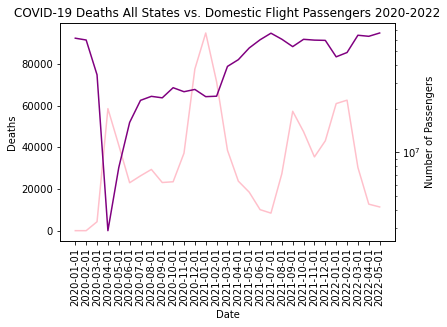

In [16]:
fig, ax = plt.subplots()

#plot timeline on the x axis and number of deaths on y
ax.plot(month, deaths, color='pink')
ax.tick_params(axis='y', labelcolor='black')
plt.xticks(rotation=90)

#add new axes
ax2 = ax.twinx()

# plot domestic flight traffic and set scale to logarithmic to scale with deaths 
ax2.plot(dom_flights, color='purple')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='black')

ax.set_title('COVID-19 Deaths All States vs. Domestic Flight Passengers 2020-2022')
ax.set_xlabel('Date')
ax.set_ylabel('Deaths')
ax2.set_ylabel('Number of Passengers')

plt.show()

In [ ]:
#possible additional deliverable?
#plot matplotlib timeline of mask mandates and major holidays versus covid deaths
#https://cds.climate.copernicus.eu/toolbox/doc/how-to/3_how_to_plot_time_series/3_how_to_plot_time_series.html

In [17]:
#find month/year with peak deaths
air_vs_deaths2.iloc[air_vs_deaths2['deaths_permonth'].idxmax()]

Month_year         2021-01-01
domestic             24305908
deaths_permonth       94788.0
Name: 12, dtype: object

In [18]:
#find top 5 month/year with peak deaths 
air_vs_deaths.sort_values('deaths_permonth',ascending=False)
#top 3 deaths by month were in the beginning of 2021... what events could have led to this?

,domestic,Month_year,state,deaths_permonth
95,2879712,2020-04-01,New York,21687.0
518,24305908,2021-01-01,California,14963.0
568,24483505,2021-02-01,California,11285.0
922,53903524,2021-09-01,Florida,10448.0
556,24305908,2021-01-01,Texas,9087.0
...,...,...,...,...
54,34420555,2020-03-01,South Dakota,0.0
358,23854772,2020-09-01,Vermont,0.0
408,28027209,2020-10-01,Vermont,0.0
1,61638893,2020-01-01,California,0.0


Correlation between various features


C:\Users\laure\AppData\Local\Temp\ipykernel_5372\2737270796.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p=sns.heatmap(macro_df.corr(), annot=True,cmap ='PiYG',linewidths=4)


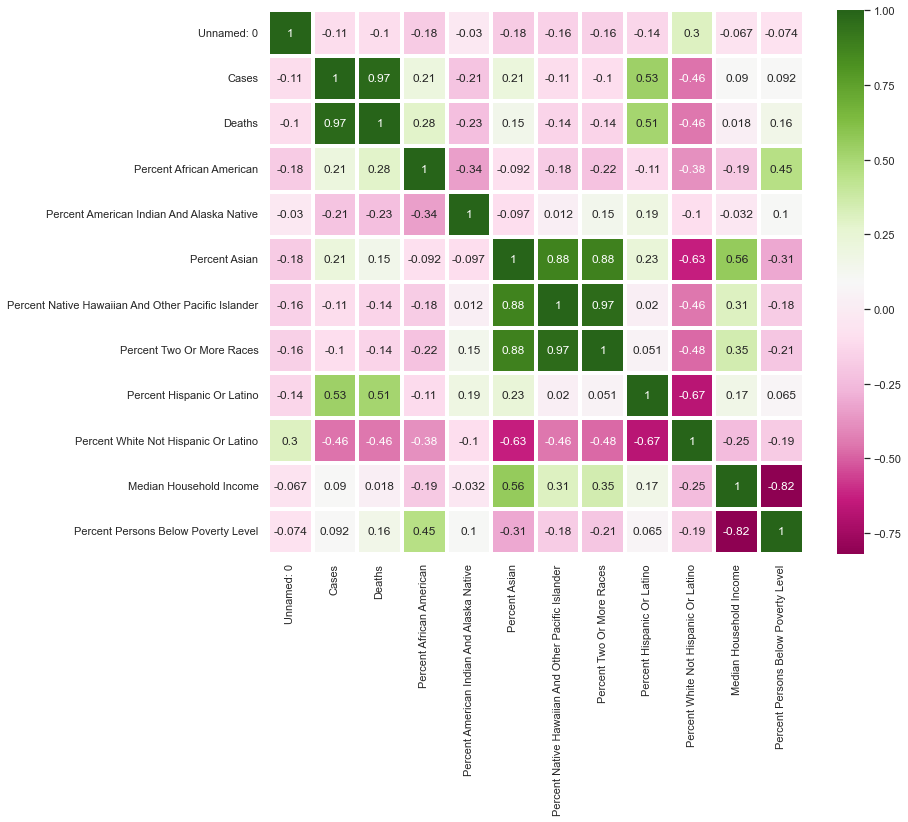

In [45]:
#plot correlation between columns in macro info dataframe
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(macro_df.corr(), annot=True,cmap ='PiYG',linewidths=4)

In [46]:
#correlation between deaths and other columns
#The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
#The number varies from -1 to 1.
#1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
#0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
#-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
#0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

deaths_corr = macro_df[macro_df.columns[1:]].corr()['Deaths'][:]

print(deaths_corr)

Cases                                                 0.972835
Deaths                                                1.000000
Percent African American                              0.284429
Percent American Indian And Alaska Native            -0.233784
Percent Asian                                         0.152739
Percent Native Hawaiian And Other Pacific Islander   -0.141082
Percent Two Or More Races                            -0.138420
Percent Hispanic Or Latino                            0.509409
Percent White Not Hispanic Or Latino                 -0.457014
Median Household Income                               0.017616
Percent Persons Below Poverty Level                   0.160474
Name: Deaths, dtype: float64


C:\Users\laure\AppData\Local\Temp\ipykernel_5372\636206814.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  deaths_corr = macro_df[macro_df.columns[1:]].corr()['Deaths'][:]


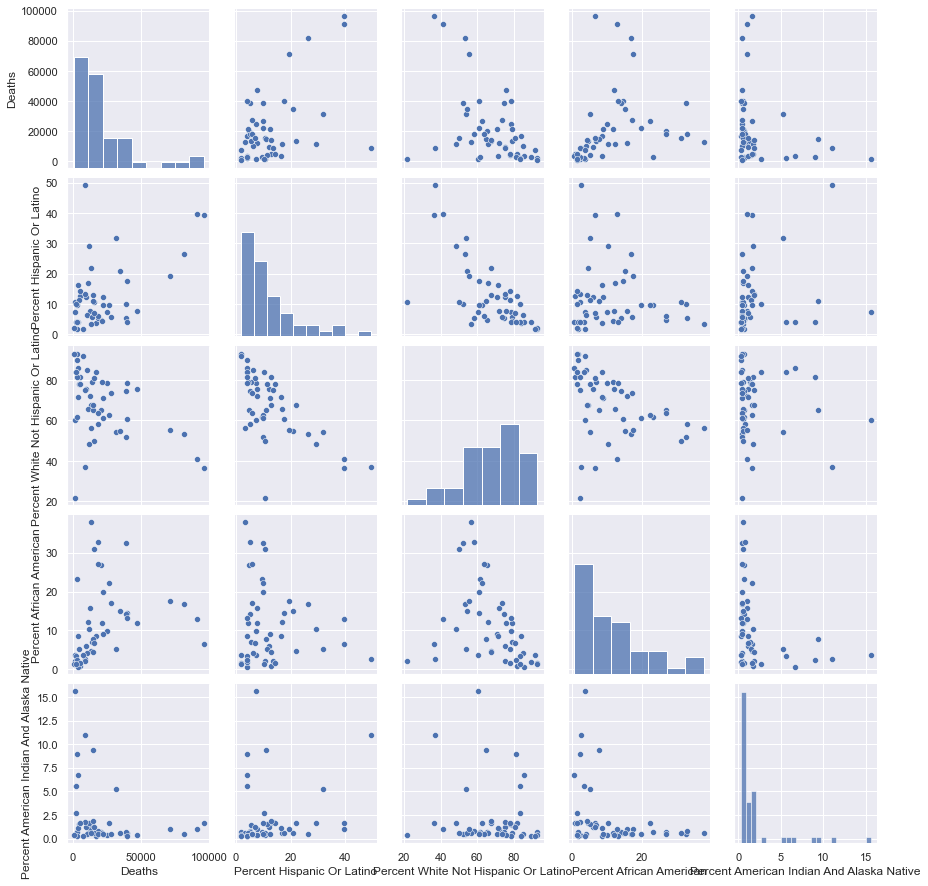

In [44]:
#correlogram of different demographic and macroeconomic indicators vs total deaths
sns.pairplot(macro_df[['Deaths','Percent Hispanic Or Latino','Percent White Not Hispanic Or Latino',
                'Percent African American','Percent American Indian And Alaska Native']],
             height=2.5)
sns.set(font_scale=1)

In [22]:
state_pop_2021 = pd.read_csv('state_pop_2021.csv', index_col=[0]) 
state_deaths_2021 = pd.read_csv('state_deaths_2021.csv', index_col=[0])
deaths_pop_2021 = pd.read_csv('deaths_pop_2021.csv',index_col=[0])
print(state_deaths_2021.head())
print(state_pop_2021.head())
print(deaths_pop_2021.head())

            state  deaths        date
36854     Alabama   11583  2021-12-31
36855      Alaska     756  2021-12-31
36857     Arizona   15214  2021-12-31
36858    Arkansas    5437  2021-12-31
36859  California   50473  2021-12-31
        state  population  % population affected
4     Alabama     5039877               0.002298
5      Alaska      732673               0.001032
6     Arizona     7276316               0.002091
7    Arkansas     3025891               0.001797
8  California    39237836               0.001286
        state  deaths        date  population
0     Alabama   11583  2021-12-31     5039877
1      Alaska     756  2021-12-31      732673
2     Arizona   15214  2021-12-31     7276316
3    Arkansas    5437  2021-12-31     3025891
4  California   50473  2021-12-31    39237836


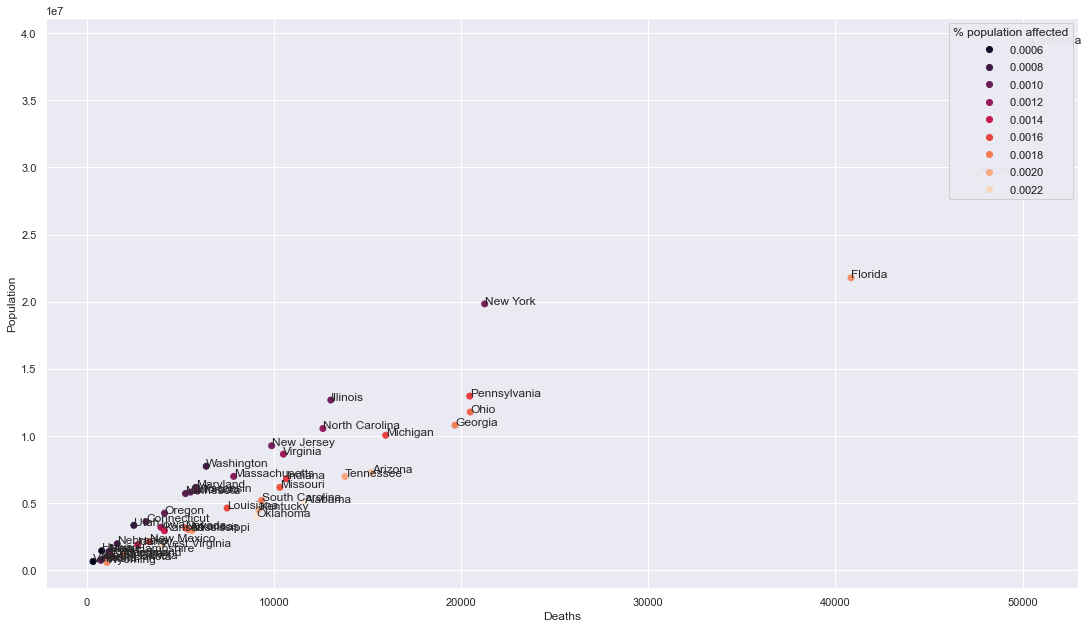

In [23]:
#plot state deaths versus state populations
x = deaths_pop_2021['deaths']
y = deaths_pop_2021['population']
c = state_pop_2021['% population affected']

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=c)
ax.set_xlabel('Deaths')
ax.set_ylabel('Population')
annotations=deaths_pop_2021['state'].tolist()
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

legend1 = ax.legend(*scatter.legend_elements(),
                    loc='upper right', title='% population affected')
ax.add_artist(legend1)

fig.set_size_inches(18.5, 10.5)

plt.show()

In [42]:
#create merged data frame so can annotate state name onto graph
merged=pd.merge(deaths_pop_2021, state_pop_2021, on='state', how='outer')
#merged.head()

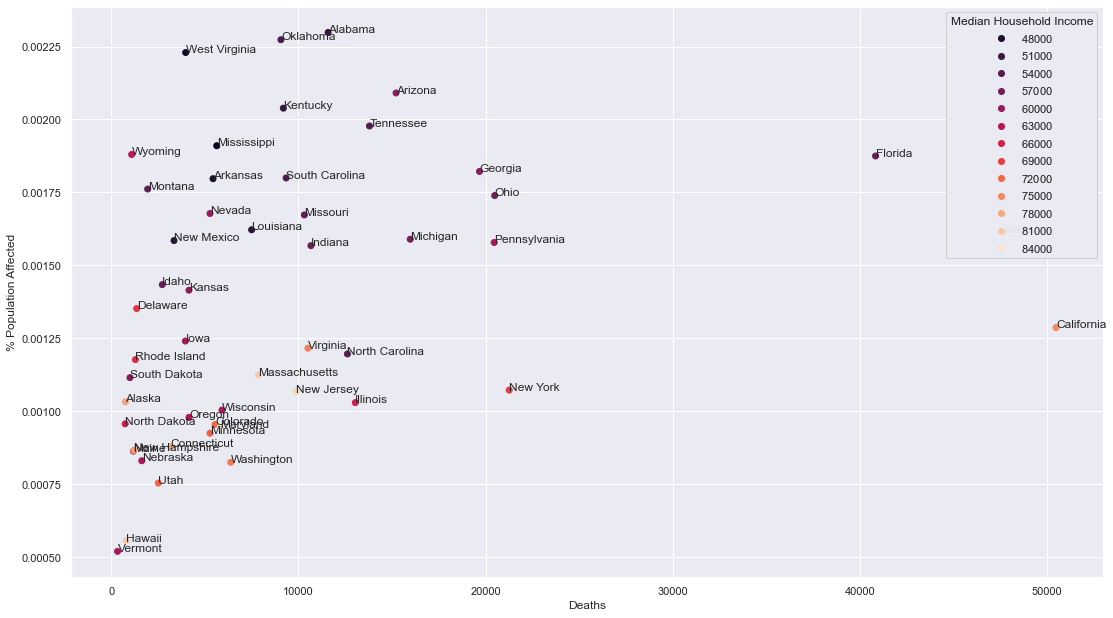

In [43]:
x = merged['deaths']
y = merged['% population affected']
c = macro_df['Median Household Income']

fig, ax = plt.subplots()
scatter = ax.scatter(x, y,c=c)
ax.set_xlabel('Deaths')
ax.set_ylabel('% Population Affected')

annotations=merged['state'].tolist()
for i, label in enumerate(annotations):
    plt.annotate(label, (x[i], y[i]))

legend1 = ax.legend(*scatter.legend_elements(),
                    loc='upper right', title='Median Household Income')
ax.add_artist(legend1)
fig.set_size_inches(18.5, 10.5)

plt.show()

In [52]:
#import health indicators dataframe
state_health_df = pd.read_csv('state_health_df_2021.csv', index_col=[0])
state_health_df['Measure Name'].unique().tolist()

['Access to Care - Annual',
 'Adverse Childhood Experiences',
 'Air and Water Quality - Annual',
 'Air Pollution',
 'All Determinants - Annual',
 'Arthritis',
 'Arthritis - $25-$49,999',
 'Arthritis - $50-$74,999',
 'Arthritis - $75,000 or More',
 'Arthritis - Ages 18-44',
 'Arthritis - Ages 45-64',
 'Arthritis - Ages 65+',
 'Arthritis - American Indian/Alaska Native',
 'Arthritis - Asian',
 'Arthritis - Black',
 'Arthritis - College Grad',
 'Arthritis - Female',
 'Arthritis - Hawaiian/Pacific Islander',
 'Arthritis - High School/GED',
 'Arthritis - Hispanic',
 'Arthritis - Less Than $25,000',
 'Arthritis - Less Than High School',
 'Arthritis - Male',
 'Arthritis - Multiracial',
 'Arthritis - Other Race',
 'Arthritis - Some Post-High School',
 'Arthritis - White',
 'Asthma',
 'Asthma - $25-$49,999',
 'Asthma - $50-$74,999',
 'Asthma - $75,000 or More',
 'Asthma - Ages 18-44',
 'Asthma - Ages 45-64',
 'Asthma - Ages 65+',
 'Asthma - American Indian/Alaska Native',
 'Asthma - Asian',
 'A

In [61]:
#health indicators dataframe merged with total deaths per state 
health=pd.merge(state_health_df, df, on='State', how='outer')
health.head()

,Measure Name,State,Rank,Value,Score,Date,Fips,Cases,Deaths
0,Access to Care - Annual,Alaska,20.0,0.494,0.494,2022-10-13,2,305705,1350
1,Adverse Childhood Experiences,Alaska,44.0,18.900,1.310,2022-10-13,2,305705,1350
2,Air and Water Quality - Annual,Alaska,43.0,-0.398,-0.398,2022-10-13,2,305705,1350
3,Air Pollution,Alaska,16.0,6.800,-0.940,2022-10-13,2,305705,1350
4,All Determinants - Annual,Alaska,31.0,-0.115,-0.115,2022-10-13,2,305705,1350


In [62]:
cardio_data = health[health['Measure Name'] == 'Cardiovascular Diseases']
cardio_corr = cardio_data[['Rank','Value','Score','Deaths']].corr()

print(cardio_data.head())
print(cardio_corr)

                 Measure Name       State  Rank  Value  Score        Date  \
97    Cardiovascular Diseases      Alaska   4.0    6.9  -0.91  2022-10-13   
1105  Cardiovascular Diseases     Alabama  44.0   11.0   1.37  2022-10-13   
2113  Cardiovascular Diseases    Arkansas  48.0   12.2   2.00  2022-10-13   
3121  Cardiovascular Diseases     Arizona  24.0    8.1  -0.25  2022-10-13   
4129  Cardiovascular Diseases  California   6.0    7.0  -0.89  2022-10-13   

      Fips     Cases  Deaths  
97       2    305705    1350  
1105     1   1528739   20505  
2113     5    955208   12347  
3121     4   2277635   31455  
4129     6  11316736   96442  
            Rank     Value     Score    Deaths
Rank    1.000000  0.959671  0.974553 -0.012179
Value   0.959671  1.000000  0.991404  0.013616
Score   0.974553  0.991404  1.000000  0.022722
Deaths -0.012179  0.013616  0.022722  1.000000


In [74]:
#It seems like cardiovascular disease doesn't have much correlation to deaths. Let's check out other health indicators.
access_data = health.loc[health['Measure Name'] == 'Access to Care - Annual']
print(access_data.head())

access_corr = access_data[['Rank','Value','Score','Deaths']].corr()
print(access_corr)

#save dataframe with access to healthcare data per state 
access_data.to_csv('access_data.csv')

                 Measure Name       State  Rank  Value  Score        Date  \
0     Access to Care - Annual      Alaska  20.0  0.494  0.494  2022-10-13   
1008  Access to Care - Annual     Alabama  45.0 -0.900 -0.900  2022-10-13   
2016  Access to Care - Annual    Arkansas  43.0 -0.681 -0.681  2022-10-13   
3024  Access to Care - Annual     Arizona  42.0 -0.657 -0.657  2022-10-13   
4032  Access to Care - Annual  California  18.0  0.569  0.569  2022-10-13   

      Fips     Cases  Deaths  
0        2    305705    1350  
1008     1   1528739   20505  
2016     5    955208   12347  
3024     4   2277635   31455  
4032     6  11316736   96442  
           Rank     Value     Score    Deaths
Rank    1.00000 -0.980870 -0.980870  0.195090
Value  -0.98087  1.000000  1.000000 -0.265543
Score  -0.98087  1.000000  1.000000 -0.265543
Deaths  0.19509 -0.265543 -0.265543  1.000000


It looks like the rank, value and score of access to health care has a higher correlation than cardiovascular disease.
This relationship definitely makes sense. What about the other health indicators? 

In [75]:
housing_data = health.loc[health['Measure Name'] == 'Crowded Housing']
print(housing_data.head())

housing_corr = housing_data[['Rank','Value','Score','Deaths']].corr()
print(housing_corr)

         Measure Name       State  Rank  Value  Score        Date  Fips  \
196   Crowded Housing      Alaska  48.0    6.7   2.00  2022-10-13     2   
1204  Crowded Housing     Alabama   2.0    1.5  -1.14  2022-10-13     1   
2212  Crowded Housing    Arkansas  36.0    2.8  -0.32  2022-10-13     5   
3220  Crowded Housing     Arizona  44.0    4.3   0.64  2022-10-13     4   
4228  Crowded Housing  California  49.0    8.2   2.00  2022-10-13     6   

         Cases  Deaths  
196     305705    1350  
1204   1528739   20505  
2212    955208   12347  
3220   2277635   31455  
4228  11316736   96442  
            Rank     Value     Score    Deaths
Rank    1.000000  0.793469  0.853794  0.287278
Value   0.793469  1.000000  0.982940  0.332639
Score   0.853794  0.982940  1.000000  0.341940
Deaths  0.287278  0.332639  0.341940  1.000000


In [76]:
healthstatus_data = health.loc[health['Measure Name'] ==  'High Health Status',]
print(healthstatus_data.head())

healthstatus_corr = healthstatus_data[['Rank','Value','Score','Deaths']].corr()
print(healthstatus_corr)

            Measure Name       State  Rank  Value  Score        Date  Fips  \
567   High Health Status      Alaska  20.0   57.8   0.52  2022-10-13     2   
1575  High Health Status     Alabama  48.0   47.5  -1.74  2022-10-13     1   
2583  High Health Status    Arkansas  46.0   48.8  -1.46  2022-10-13     5   
3591  High Health Status     Arizona  32.0   55.1  -0.08  2022-10-13     4   
4599  High Health Status  California  40.0   53.3  -0.47  2022-10-13     6   

         Cases  Deaths  
567     305705    1350  
1575   1528739   20505  
2583    955208   12347  
3591   2277635   31455  
4599  11316736   96442  
            Rank     Value     Score    Deaths
Rank    1.000000 -0.972679 -0.977843  0.266266
Value  -0.972679  1.000000  0.998826 -0.195003
Score  -0.977843  0.998826  1.000000 -0.203307
Deaths  0.266266 -0.195003 -0.203307  1.000000


Hypothesis Testing

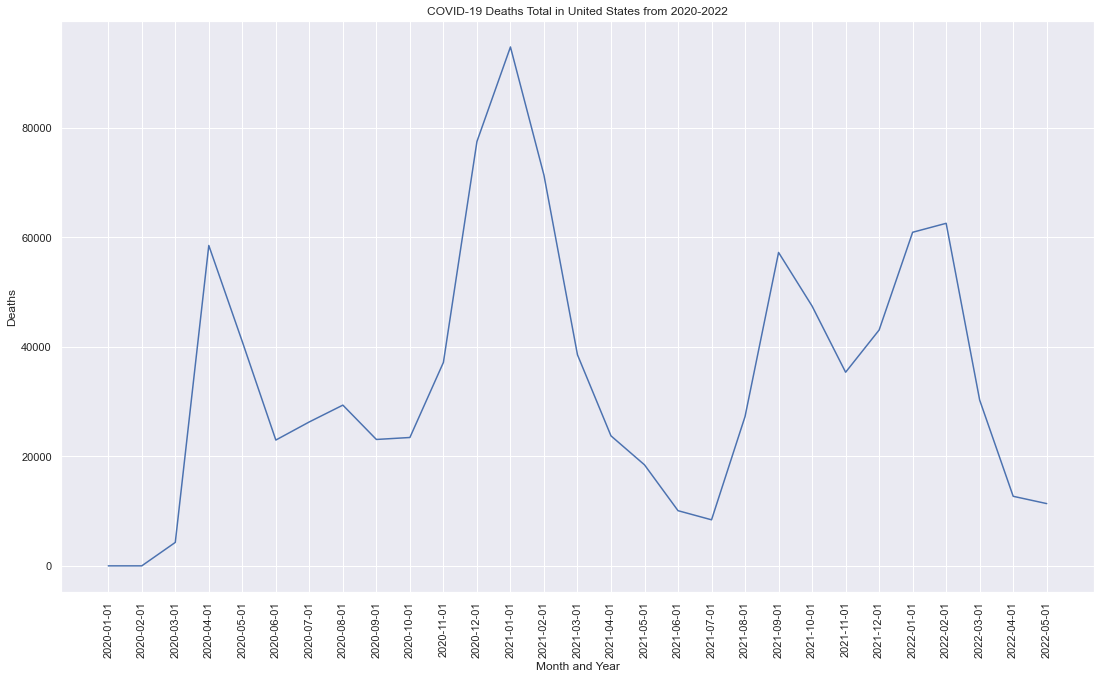

In [82]:
#plots deaths per month for United States as whole
x = air_vs_deaths2['Month_year']
y = air_vs_deaths2['deaths_permonth']

fig, ax = plt.subplots()
ax.plot(x,y)
plt.xticks(rotation=90)
plt.xlabel('Month and Year')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths Total in United States from 2020-2022')
fig.set_size_inches(18.5, 10.5)

plt.show()

In [83]:
#Extract total deaths in US per day for before and after event period
df2 = pd.read_csv('all_deaths_day.csv', index_col=[0])

In [84]:
df2 = df2.groupby(['date'])['deaths_perday'].sum().reset_index()

In [85]:
#Get total United States deaths per day of 2 months leading up to Christmas 2020/2021 and 2 months after. 
#Create new dataframe with this information and run ANOVA

#Hypothesis: Holidays led to higher prevalence of COVID-19

mask_1 = (df2['date'] >= '2020-11-01') & (df2['date'] <= '2020-12-01')
before_20 = df2.loc[mask_1]
#print(before_20)

mask_2 = (df2['date'] >= '2021-01-01') & (df2['date'] <= '2021-02-01')
after_21 = df2.loc[mask_2]
#print(after_21)

mask_3 = (df2['date'] >= '2021-11-01') & (df2['date'] <= '2021-12-01')
before_21 = df2.loc[mask_3]
#print(before_21)

mask_4 = (df2['date'] >= '2022-01-01') & (df2['date'] <= '2022-02-01')
after_22 = df2.loc[mask_4]
#print(after_22)

In [86]:
df = pd.concat([before_20,after_21,before_21,after_21])

df_melt = pd.melt(df.reset_index(), id_vars=['date'], value_vars=['deaths_perday'])
df_melt['date'] = pd.to_datetime(df_melt['date'])
df_melt.columns = ['date', 'Variable', 'Deaths_PerDay']
print(df_melt)

          date       Variable  Deaths_PerDay
0   2020-11-01  deaths_perday          418.0
1   2020-11-02  deaths_perday          532.0
2   2020-11-03  deaths_perday         1125.0
3   2020-11-04  deaths_perday         1604.0
4   2020-11-05  deaths_perday         1100.0
..         ...            ...            ...
121 2021-01-28  deaths_perday         3854.0
122 2021-01-29  deaths_perday         3584.0
123 2021-01-30  deaths_perday         2628.0
124 2021-01-31  deaths_perday         1854.0
125 2021-02-01  deaths_perday         1940.0

[126 rows x 3 columns]


In [87]:
df_melt['month'] = df_melt['date'].dt.strftime('%b')

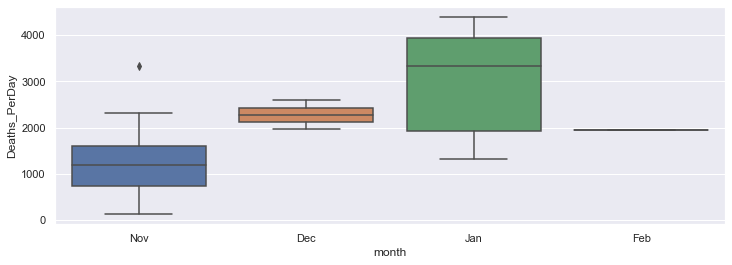

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='Deaths_PerDay',data=df_melt,ax=ax)
plt.show()

Null hypothesis: The prevalence of COVID-19 deaths is not affected by the holiday season. 

In [89]:
import scipy.stats as stats

#run ANOVA on dates before and after Christmas 2020
df_anova = df_melt[['Deaths_PerDay']]
fvalue, pvalue = stats.f_oneway(df_anova.iloc[[0,1]], df_anova.iloc[[2,3]])
print(fvalue, pvalue)

#run ANOVA on dates before and after Christmas 2021
fvalue2, pvalue2 = stats.f_oneway(df_anova.iloc[[4,5]], df_anova.iloc[[6,7]])
print(fvalue2, pvalue2)

[13.05428214] [0.06879249]
[2.38099311] [0.26278734]


#Conclusion
